# Customer Churn Decision Tree

Note: on top of `numpy`, `pandas`, `matplotlib`, you need two more packages for this assignment: `scikit-learn` (for building decision tree and other machine learning models) and 
`pydotplus` (for visualizing the decision trees), you want to add those packages to your `requirements.txt` file and install them before running this notebook.

In [1]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1
- what's the shape of the dataframe created from the csv file? 
- how many features and what are their datatype?
- are there any null values in the dataset?
- create a histogram for the target feature and calculate the churn rate
- if you want to make a "naive" prediction on customer churn rate, what's the rule? 

In [2]:
# load the csv file
churn = pd.read_csv('customer-churn-example-simple.csv')

In [10]:
# create a deep copy of the df
df_train = churn.copy()
# check the basic info for the df
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   customer service calls  3333 non-null   int64  
 6   churn                   3333 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 159.6+ KB
None
(3333, 7)


In [4]:
# get first five rows.
df_train.head()

,state,account length,international plan,total day minutes,total day calls,customer service calls,churn
0,KS,128,no,265.1,110,1,False
1,OH,107,no,161.6,123,1,False
2,NJ,137,no,243.4,114,0,False
3,OH,84,yes,299.4,71,2,False
4,OK,75,yes,166.7,113,3,False


In [8]:
# change churn to string from boolean for histogram and decision tree modeling
df_train['churn'] = df_train['churn'].apply(str)
df_train.head()

,state,account length,international plan,total day minutes,total day calls,customer service calls,churn
0,KS,128,no,265.1,110,1,False
1,OH,107,no,161.6,123,1,False
2,NJ,137,no,243.4,114,0,False
3,OH,84,yes,299.4,71,2,False
4,OK,75,yes,166.7,113,3,False


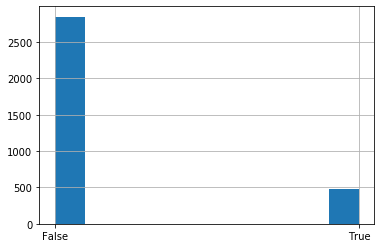

In [7]:
# create a histogram for churn
df_train['churn'].hist()

In [9]:
# calculate the churn rate
a = df_train['churn'].value_counts()
print(a)
print(f'the churn rate is {a[1]/a.sum():.1%}')

False    2850
True      483
Name: churn, dtype: int64
the churn rate is 14.5%


* There are total 3333 rows, and 7 columns.
* There are 6 features. Their data types are object, integer, and float.
* There is no null values in the dataset.
* The churn rate is 14.5%.
* If I want to make a navie prediction, I would say there is less likely will churn the customers.

## Task
Build a decision tree:

- use only 'account length', 'total day calls', 'customer service calls' features
- use entropy as the criterion and set the max depth for the tree to 4 
- visualize the tree as shown in the sample code provided in the class. 
- explain the first node (root) of your generated tree (example each line in the node - what they mean)
- make predictions for three customers based on the sample input found in the comments below and explain your predictions - do they make sense?
- by looking at the decision tree image and change one value for customer 2 to flip the prediction and explain why

In [11]:
# build your DT using 'account length', 'total day calls', 'customer service calls' features
X = df_train[[ 'account length', 'total day calls', 'customer service calls' ]]
y = df_train['churn']
print(X.shape)
print(y.shape)

(3333, 3)
(3333,)


In [12]:
# train a DT model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
# load the packages for visulizing the tree
from IPython.display import Image 
from sklearn import tree
import pydotplus

In [20]:
# get feature and class names for visulization
print(X.columns.values.tolist())
print(y.unique().tolist())
cls_names = ['Not churn' if i == 0 else 'churn' for i in y.unique().tolist ()] # convert to string for class names
cls_names

['account length', 'total day calls', 'customer service calls']
[False, True]


['Not churn', 'churn']

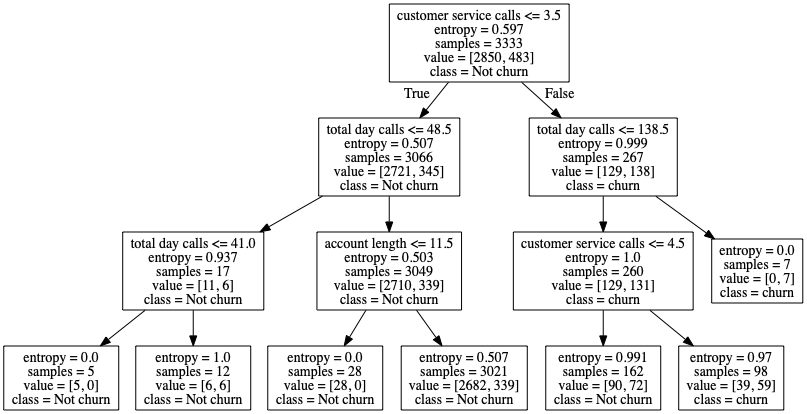

In [21]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3) 
tree_clf.fit(X, y)
# Create DOT data and visualize the tree
dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.values.tolist(),
class_names=cls_names, )
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [22]:
# make predictions for the following customers
# customer 1 who open the account 25 days ago with total day calls of 100 and called customer support 5 times
# customer 2 who open the account 125 days ago with total day calls of 150 and called customer support 0 times
# customer 3 who open the account 600 days ago with total day calls of 1150 and called customer support 8 times
customer1 = tree_clf.predict([[25, 100, 5]]) 
customer2 = tree_clf.predict([[125, 150,0]])
customer3 = tree_clf.predict([[600, 1150,8]])
print(customer1,customer2,customer3)

[ True] [False] [ True]
